# **Project "Spaceship Titanic"**

In [6]:
# data and array managament
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import missingno as msno

# sckikit-learn libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pickle





## **1. Overview**

The task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. The model to use would be "Classification" (**Logistic Regression**) because of the fact that we only need one possible value: 1 (True) or 0 (False). It's just about probability. Besides, the data is tabular, therefore, it´s a supervised machine learning algorithm.

## **2. Preprocessing**

In **Preprocessing** stage, we´ll clean the data (null values), manage missing valuesa and codification of the categorical variables, including the **train** dataset and the **test** dataset.

### **2.1 Data Cleaning**

#### **Train datase**

In [7]:
train_SpaceTitanic = pd.read_csv('train.csv')

In [8]:
train_SpaceTitanic.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


In [9]:
train_SpaceTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


We can see that there some columns which have null values. These are: HomePlanet, CryoSleep,Cabin, Destination, Age,Name, VRDeck, Spa, VIP,  RoomService. On the other hand, there are 8693 passengers in this train set.

<Axes: >

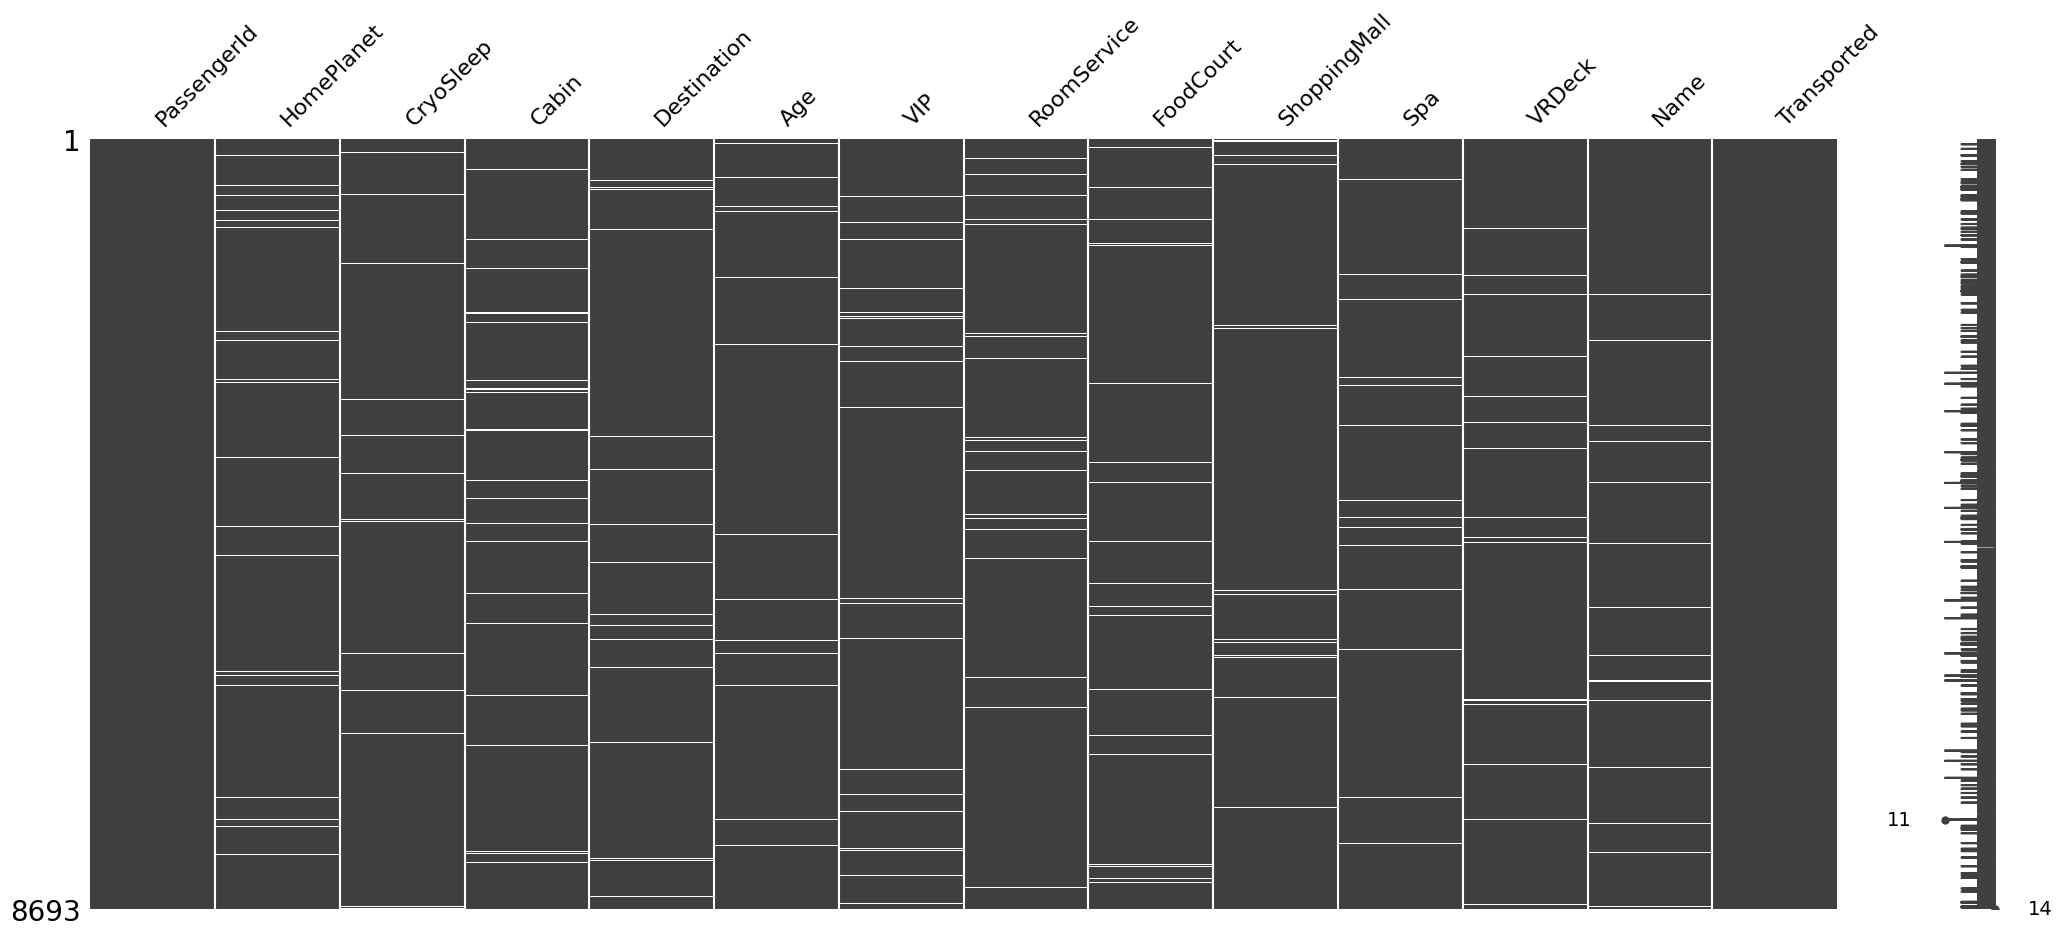

In [10]:
# here we obtain a matrix with the null values...
msno.matrix(train_SpaceTitanic)

In [11]:
# here, we can see the number of null values per column.
n_nulls_train = train_SpaceTitanic.isnull().sum()
print("The number of null values per attribute is:")
n_nulls_train

The number of null values per attribute is:


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [12]:
# here we count the total number of null values in the train dataset
n_nulls_train = train_SpaceTitanic.isnull().sum().sum()
print(f"The total null values in the train dataset is: {n_nulls_train}.")

The total null values in the train dataset is: 2324.


In [13]:
# here, we drop all the null values in the train dataset

train_SpaceTitanic = train_SpaceTitanic.dropna(axis=0,how = 'any')
train_SpaceTitanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 729.0+ KB


In [14]:
train_SpaceTitanic = train_SpaceTitanic.drop_duplicates()
train_SpaceTitanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 729.0+ KB


We can see thet there were no duplicates in the train dataset.

In [15]:
train_SpaceTitanic.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


In [16]:
train_SpaceTitanic.describe

<bound method NDFrame.describe of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService

We can see that there are 6606 registers in the training set. Let´s see the test set.

#### **Test datase**

In [17]:
test_SpaceTitanic = pd.read_csv('test.csv')

In [18]:
test_SpaceTitanic.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus


In [19]:
test_SpaceTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


<Axes: >

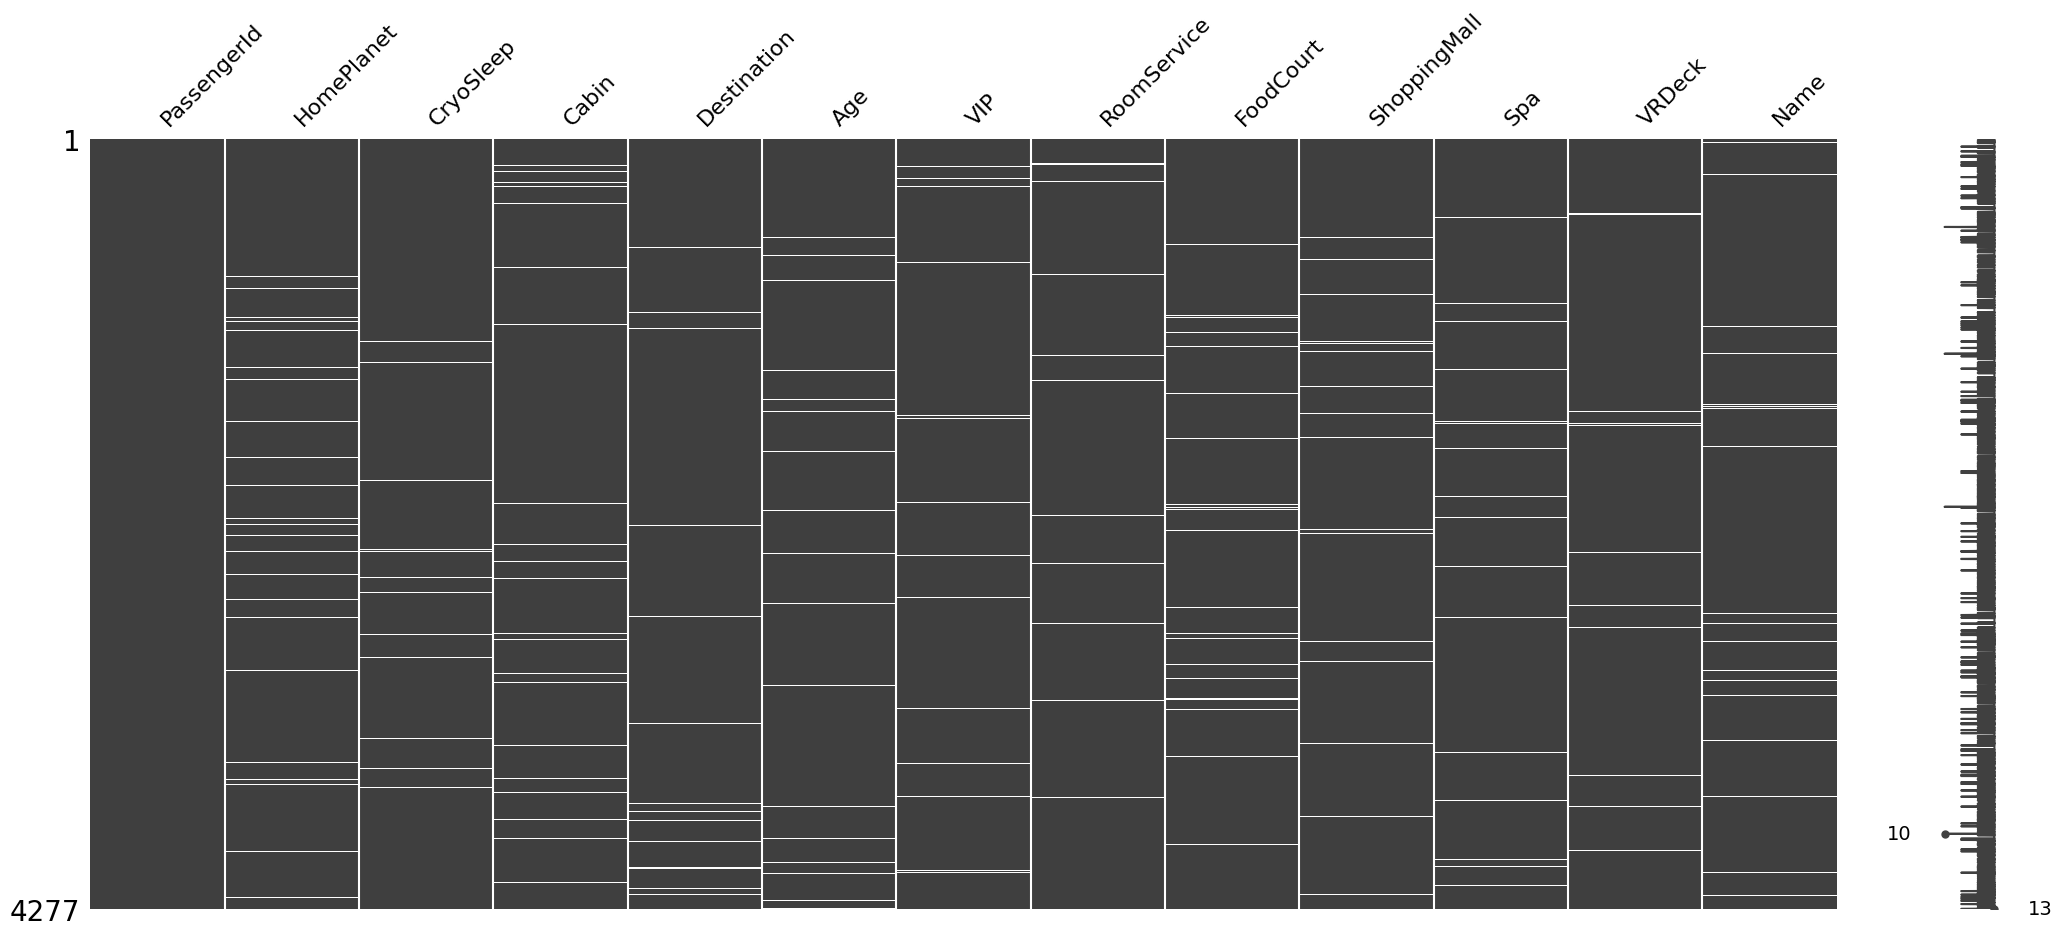

In [20]:
# here we can see the null values (the white lines)
msno.matrix(test_SpaceTitanic)

We can see that in total there are in total 4277 passengers in the test set. The majority of the fiels have null values, however, in a small percent.

In [21]:
# here, we can see the number of null values per column in the test dataset
n_nulls_test = test_SpaceTitanic.isnull().sum()
print("The number of null values per attribute is:")
n_nulls_test

The number of null values per attribute is:


PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [22]:
# here we count the total number of null values in the test dataset
n_nulls_test = test_SpaceTitanic.isnull().sum().sum()
print(f"The total null values in the test dataset is: {n_nulls_test}.")

The total null values in the test dataset is: 1117.


In [23]:
test_SpaceTitanic = test_SpaceTitanic.dropna()
test_SpaceTitanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3281 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   3281 non-null   object 
 1   HomePlanet    3281 non-null   object 
 2   CryoSleep     3281 non-null   object 
 3   Cabin         3281 non-null   object 
 4   Destination   3281 non-null   object 
 5   Age           3281 non-null   float64
 6   VIP           3281 non-null   object 
 7   RoomService   3281 non-null   float64
 8   FoodCourt     3281 non-null   float64
 9   ShoppingMall  3281 non-null   float64
 10  Spa           3281 non-null   float64
 11  VRDeck        3281 non-null   float64
 12  Name          3281 non-null   object 
dtypes: float64(6), object(7)
memory usage: 358.9+ KB


In [24]:
test_SpaceTitanic = test_SpaceTitanic.drop_duplicates()
test_SpaceTitanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3281 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   3281 non-null   object 
 1   HomePlanet    3281 non-null   object 
 2   CryoSleep     3281 non-null   object 
 3   Cabin         3281 non-null   object 
 4   Destination   3281 non-null   object 
 5   Age           3281 non-null   float64
 6   VIP           3281 non-null   object 
 7   RoomService   3281 non-null   float64
 8   FoodCourt     3281 non-null   float64
 9   ShoppingMall  3281 non-null   float64
 10  Spa           3281 non-null   float64
 11  VRDeck        3281 non-null   float64
 12  Name          3281 non-null   object 
dtypes: float64(6), object(7)
memory usage: 358.9+ KB


We can see thet there were no duplicates in the test dataset.

In [25]:
# here, I eliminated the column 'Name' because is unuseful.

train_SpaceTitanic = train_SpaceTitanic.drop(['Name'], axis = 1)

In [26]:
train_SpaceTitanic.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False


In [27]:
test_SpaceTitanic = test_SpaceTitanic.drop(['Name'], axis = 1)

In [28]:
test_SpaceTitanic.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0


### **2.2 Data coding (from categorical)**

#### **2.2.1 Data engineering**

#### **Train dataset**

In [29]:
# 1. convert categorical "HomePlanet" int numerical values
train_SpaceTitanic['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

We can see that there are three "HomePlanet", therefore, we´ll split it in three indexes : 1 for Europa, 2 for Earth and 3 for Mars.

In [30]:
homePlantet_dummies = pd.get_dummies(train_SpaceTitanic['HomePlanet'], prefix='HomePlanet')

In [31]:
homePlantet_dummies.head(5)

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0


In [32]:
homePlantet_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   HomePlanet_Earth   6606 non-null   uint8
 1   HomePlanet_Europa  6606 non-null   uint8
 2   HomePlanet_Mars    6606 non-null   uint8
dtypes: uint8(3)
memory usage: 71.0 KB


In [33]:
train_SpaceTitanic = pd.concat([train_SpaceTitanic,homePlantet_dummies],axis=1)

In [34]:
train_SpaceTitanic

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,0,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,0,1,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,1,0,0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,0,1,0


In [35]:
train_SpaceTitanic = train_SpaceTitanic.drop(['HomePlanet'], axis=1)

In [36]:
train_SpaceTitanic.head(3)

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0001_01,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,0
1,0002_01,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,0,0
2,0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0


In [37]:
train_SpaceTitanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        6606 non-null   object 
 1   CryoSleep          6606 non-null   object 
 2   Cabin              6606 non-null   object 
 3   Destination        6606 non-null   object 
 4   Age                6606 non-null   float64
 5   VIP                6606 non-null   object 
 6   RoomService        6606 non-null   float64
 7   FoodCourt          6606 non-null   float64
 8   ShoppingMall       6606 non-null   float64
 9   Spa                6606 non-null   float64
 10  VRDeck             6606 non-null   float64
 11  Transported        6606 non-null   bool   
 12  HomePlanet_Earth   6606 non-null   uint8  
 13  HomePlanet_Europa  6606 non-null   uint8  
 14  HomePlanet_Mars    6606 non-null   uint8  
dtypes: bool(1), float64(6), object(5), uint8(3)
memory usage: 645.1+ KB


In [38]:
# let´s change 'Destination' categorial

train_SpaceTitanic['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

We can see that there are three destinations, which we´ll trasform into numbers using a dictionary.

In [39]:
dict_Destination= {'TRAPPIST-1e':1,'PSO J318.5-22':2,'55 Cancri e':3}

train_SpaceTitanic['Destination'] = train_SpaceTitanic['Destination'].map(dict_Destination)
train_SpaceTitanic.head(3)


,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0001_01,False,B/0/P,1,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,0
1,0002_01,False,F/0/S,1,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,0,0
2,0003_01,False,A/0/S,1,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0


In [40]:
# now, we´ll try to split the dataset into "groups" of passengers based on the format as gggg_pp, where "gggg" is the group which the passenger belongs to. These
# are string objects.

passengersID = train_SpaceTitanic['PassengerId']
passengersID


0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 6606, dtype: object

In [41]:
list_of_passengers = []

for i in passengersID:
    list_of_passengers.append(i)

In [42]:
def splitPassenger(list_of_strings : str):
    '''
        From the format of 'aaaa_bb' type string, this function retrieves a list with only 'aaaa' type integer. It works with only input string type.
    '''
    result = []
    for i in list_of_strings:
        r1 = i.split('_')
        r2 = r1.pop(0)
        r3 = int(r2)
        result.append(r3)

    return result

In [43]:
result_passengers = splitPassenger(list_of_passengers)

result_passengers

[1,
 2,
 3,
 3,
 4,
 5,
 6,
 7,
 8,
 8,
 9,
 10,
 11,
 15,
 16,
 17,
 17,
 20,
 20,
 20,
 20,
 25,
 26,
 28,
 30,
 31,
 31,
 34,
 35,
 38,
 41,
 43,
 44,
 44,
 44,
 45,
 51,
 53,
 56,
 56,
 56,
 58,
 61,
 62,
 66,
 67,
 67,
 67,
 70,
 71,
 72,
 73,
 74,
 76,
 77,
 78,
 81,
 82,
 82,
 84,
 85,
 86,
 88,
 90,
 91,
 92,
 92,
 97,
 98,
 98,
 99,
 102,
 103,
 103,
 107,
 108,
 110,
 110,
 111,
 112,
 113,
 114,
 116,
 119,
 122,
 123,
 126,
 127,
 128,
 128,
 133,
 133,
 134,
 138,
 139,
 140,
 140,
 144,
 146,
 147,
 148,
 151,
 160,
 163,
 163,
 164,
 167,
 167,
 169,
 170,
 171,
 172,
 174,
 177,
 178,
 179,
 179,
 179,
 181,
 182,
 183,
 186,
 188,
 189,
 192,
 192,
 192,
 193,
 193,
 195,
 196,
 197,
 199,
 200,
 201,
 201,
 202,
 203,
 205,
 207,
 211,
 211,
 211,
 212,
 212,
 213,
 216,
 217,
 219,
 220,
 220,
 220,
 220,
 220,
 220,
 221,
 221,
 221,
 221,
 221,
 221,
 221,
 222,
 222,
 222,
 223,
 224,
 225,
 229,
 231,
 233,
 237,
 240,
 243,
 245,
 245,
 246,
 248,
 252,
 253,
 2

In [44]:
len(result_passengers)

6606

In [45]:
train_SpaceTitanic['PassengerId'] = result_passengers
train_SpaceTitanic

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,1,False,B/0/P,1,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,0
1,2,False,F/0/S,1,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,0,0
2,3,False,A/0/S,1,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0
3,3,False,A/0/S,1,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0
4,4,False,F/1/S,1,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,False,A/98/P,3,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,0,1,0
8689,9278,True,G/1499/S,2,18.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0
8690,9279,False,G/1500/S,1,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,1,0,0
8691,9280,False,E/608/S,3,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,0,1,0


In the previous code we obtained a "new values" for the column "PassengerID" where we only focused on the number of group. Now, let´s us focus on the column
'Cabin', where from my standpoint the important informartion is the last letter, which is says if the passenger is travelling on Port (left) or Starboard (right).

In [46]:
# let´s try the 'Cabin' categorical

cabin = train_SpaceTitanic['Cabin']
cabin

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 6606, dtype: object

In [47]:
list_of_cabins = []

for i in cabin:
    list_of_cabins.append(i)

In [48]:
def splitCabin(list_of : str):
    '''
        From the format of 'deck/num/side' type string, this function retrieves a list with only 'side' type integer. It works with only input string type.
    '''
    result = []
    for i in list_of:
        r1 = i.split('/')
        r2 = r1.pop(2)
        if r2 == 'P':
            r2 = 0
        else:
            r2 = 1
        result.append(r2)

    return result

In [49]:
result_cabin = splitCabin(list_of_cabins)

In [50]:
train_SpaceTitanic['Cabin'] = result_cabin

In [51]:
train_SpaceTitanic['Cabin']

0       0
1       1
2       1
3       1
4       1
       ..
8688    0
8689    1
8690    1
8691    1
8692    1
Name: Cabin, Length: 6606, dtype: int64

In [52]:
train_SpaceTitanic.head(5)


,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,1,False,0,1,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,0
1,2,False,1,1,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,0,0
2,3,False,1,1,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0
3,3,False,1,1,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0
4,4,False,1,1,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,0,0


Let´s check out the numerical values and firstly see how many unique values has each one.

In [53]:
train_SpaceTitanic.head(5)

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,1,False,0,1,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,0
1,2,False,1,1,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,0,0
2,3,False,1,1,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0
3,3,False,1,1,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0
4,4,False,1,1,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,0,0


In [54]:
# Age

train_SpaceTitanic['Age'].value_counts()

24.0    255
18.0    255
22.0    234
21.0    227
19.0    225
       ... 
72.0      3
79.0      2
75.0      2
76.0      2
77.0      1
Name: Age, Length: 80, dtype: int64

We can see that the majority of the people are between 25 and 50 years old, and a few ones near 77.

In [55]:


min_age = train_SpaceTitanic['Age'].unique().min()
min_age


0.0

In [56]:
max_age = train_SpaceTitanic['Age'].unique().max()
max_age

79.0

In [57]:
##### - for visualization

#train_SpaceTitanic.hist(bins = 50, figsize=(20,15))

From the previous histogram we can see the most of the people are between 10 and 50 years old. Therefore, let´s take this account to make our dictionary with the range of ages.

In [58]:
def range_age (age):
  '''this function sorts the age into a range retrieving a number'''
  if age >= 0 and age <10:
    return 1;
  elif age >= 10 and age <20:
    return 2;
  elif age >= 20 and age <30:
    return 3;
  elif age >= 30 and age <40:
    return 4;
  elif age >= 40 and age <50:
    return 5;
  elif age >= 50 and age <60:
    return 6;
  elif age >= 60 and age <70:
    return 7;
  else :
    return 8

In [59]:
list_age = train_SpaceTitanic['Age']
keys = []
values = []
for i in list_age:
  keys.append(i)
  values.append(range_age(i))

In [60]:
dict_age = {k:v for k,v in zip(keys, values)}

dict_age

{39.0: 4,
 24.0: 3,
 58.0: 6,
 33.0: 4,
 16.0: 2,
 44.0: 5,
 26.0: 3,
 35.0: 4,
 14.0: 2,
 45.0: 5,
 32.0: 4,
 48.0: 5,
 28.0: 3,
 0.0: 1,
 1.0: 1,
 49.0: 5,
 10.0: 2,
 7.0: 1,
 15.0: 2,
 34.0: 4,
 43.0: 5,
 47.0: 5,
 2.0: 1,
 23.0: 3,
 20.0: 3,
 17.0: 2,
 55.0: 6,
 4.0: 1,
 21.0: 3,
 56.0: 6,
 25.0: 3,
 38.0: 4,
 27.0: 3,
 36.0: 4,
 22.0: 3,
 62.0: 7,
 18.0: 2,
 19.0: 2,
 37.0: 4,
 42.0: 5,
 13.0: 2,
 40.0: 5,
 3.0: 1,
 54.0: 6,
 9.0: 1,
 6.0: 1,
 29.0: 3,
 64.0: 7,
 67.0: 7,
 61.0: 7,
 50.0: 6,
 31.0: 4,
 8.0: 1,
 51.0: 6,
 11.0: 2,
 41.0: 5,
 30.0: 4,
 46.0: 5,
 60.0: 7,
 63.0: 7,
 57.0: 6,
 5.0: 1,
 79.0: 8,
 68.0: 7,
 59.0: 6,
 74.0: 8,
 12.0: 2,
 65.0: 7,
 53.0: 6,
 71.0: 8,
 52.0: 6,
 75.0: 8,
 76.0: 8,
 78.0: 8,
 70.0: 8,
 73.0: 8,
 66.0: 7,
 69.0: 7,
 72.0: 8,
 77.0: 8}

In [61]:
train_SpaceTitanic['Age'] = train_SpaceTitanic['Age'].map(dict_age,na_action=None)

train_SpaceTitanic['Age']

0       4
1       3
2       6
3       4
4       2
       ..
8688    5
8689    2
8690    3
8691    4
8692    5
Name: Age, Length: 6606, dtype: int64

In [62]:
train_SpaceTitanic.head(3)

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,1,False,0,1,4,False,0.0,0.0,0.0,0.0,0.0,False,0,1,0
1,2,False,1,1,3,False,109.0,9.0,25.0,549.0,44.0,True,1,0,0
2,3,False,1,1,6,True,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0


Let´s make a similar procedure with the other ones.

In [63]:
# RoomService

train_SpaceTitanic['RoomService'].unique()

array([   0.,  109.,   43., ..., 1003., 8586.,  745.])

From the histogram we could see that the most of people did not spend any dollar in this service, moreover, the range of money spent is from  0 to 2000. A similar information is given in the following.

In [64]:
train_SpaceTitanic['RoomService'].value_counts()

0.0       4318
1.0         93
2.0         60
3.0         43
4.0         35
          ... 
378.0        1
1065.0       1
260.0        1
1633.0       1
745.0        1
Name: RoomService, Length: 1093, dtype: int64

In [65]:
train_SpaceTitanic[['RoomService']].min()

RoomService    0.0
dtype: float64

In [66]:
train_SpaceTitanic[['RoomService']].max()

RoomService    9920.0
dtype: float64

In [67]:
def range_roomService (amount):
  '''this function sorts the age into a range retrieving a number'''
  if amount >= 0 and amount <500:
    return 1;
  elif amount >= 500 and amount <1000:
    return 2;
  elif amount >= 1000 and amount <1500:
    return 3;
  else:
    return 4;


In [68]:
list_roomService = train_SpaceTitanic['RoomService']
keys = []
values = []
for i in list_roomService:
  keys.append(i)
  values.append(range_roomService(i))

In [69]:
dict_roomService = {k:v for k,v in zip(keys, values)}

dict_roomService

{0.0: 1,
 109.0: 1,
 43.0: 1,
 303.0: 1,
 42.0: 1,
 39.0: 1,
 73.0: 1,
 719.0: 2,
 8.0: 1,
 412.0: 1,
 22.0: 1,
 1125.0: 3,
 214.0: 1,
 784.0: 2,
 554.0: 2,
 970.0: 2,
 279.0: 1,
 45.0: 1,
 1.0: 1,
 1946.0: 4,
 190.0: 1,
 16.0: 1,
 46.0: 1,
 147.0: 1,
 14.0: 1,
 7406.0: 4,
 688.0: 2,
 211.0: 1,
 311.0: 1,
 1743.0: 4,
 2209.0: 4,
 82.0: 1,
 55.0: 1,
 701.0: 2,
 2353.0: 4,
 2103.0: 4,
 2738.0: 4,
 440.0: 1,
 1072.0: 3,
 4119.0: 4,
 1365.0: 3,
 287.0: 1,
 3414.0: 4,
 17.0: 1,
 62.0: 1,
 84.0: 1,
 406.0: 1,
 1052.0: 3,
 902.0: 2,
 848.0: 2,
 192.0: 1,
 367.0: 1,
 1517.0: 4,
 2237.0: 4,
 1215.0: 3,
 1933.0: 4,
 1230.0: 3,
 915.0: 2,
 1406.0: 3,
 181.0: 1,
 4.0: 1,
 85.0: 1,
 56.0: 1,
 2947.0: 4,
 335.0: 1,
 272.0: 1,
 702.0: 2,
 66.0: 1,
 118.0: 1,
 44.0: 1,
 146.0: 1,
 3.0: 1,
 90.0: 1,
 368.0: 1,
 1194.0: 3,
 7.0: 1,
 331.0: 1,
 386.0: 1,
 443.0: 1,
 5715.0: 4,
 695.0: 2,
 417.0: 1,
 121.0: 1,
 434.0: 1,
 142.0: 1,
 2001.0: 4,
 148.0: 1,
 358.0: 1,
 2832.0: 4,
 116.0: 1,
 5649.0: 4,
 198.

In [70]:
train_SpaceTitanic['RoomService'] = train_SpaceTitanic['RoomService'].map(dict_roomService,na_action=None)

train_SpaceTitanic['RoomService']

0       1
1       1
2       1
3       1
4       1
       ..
8688    1
8689    1
8690    1
8691    1
8692    1
Name: RoomService, Length: 6606, dtype: int64

In [71]:
train_SpaceTitanic.head(3)

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,1,False,0,1,4,False,1,0.0,0.0,0.0,0.0,False,0,1,0
1,2,False,1,1,3,False,1,9.0,25.0,549.0,44.0,True,1,0,0
2,3,False,1,1,6,True,1,3576.0,0.0,6715.0,49.0,False,0,1,0


In [72]:
#FoodCourt

train_SpaceTitanic['FoodCourt'].unique()

array([   0.,    9., 3576., ..., 1146., 6819., 4688.])

In [73]:
train_SpaceTitanic['FoodCourt'].min()

0.0

In [74]:
train_SpaceTitanic['FoodCourt'].max()

29813.0

In [75]:
train_SpaceTitanic.head(3)

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,1,False,0,1,4,False,1,0.0,0.0,0.0,0.0,False,0,1,0
1,2,False,1,1,3,False,1,9.0,25.0,549.0,44.0,True,1,0,0
2,3,False,1,1,6,True,1,3576.0,0.0,6715.0,49.0,False,0,1,0


In [76]:
train_SpaceTitanic['FoodCourt'].value_counts()

0.0        4241
1.0          83
2.0          47
4.0          38
3.0          37
           ... 
3157.0        1
2333.0        1
3439.0        1
10679.0       1
4688.0        1
Name: FoodCourt, Length: 1293, dtype: int64

In [77]:
def range_amountFood (amountFood):
  '''this function sorts the age into a range retrieving a number'''
  if amountFood >= 0 and amountFood <1500:
    return 1;
  elif amountFood >= 1500 and amountFood <3000:
    return 2;
  elif amountFood >= 3000 and amountFood <4500:
    return 3;
  elif amountFood >= 4500 and amountFood <6000:
    return 4;
  elif amountFood >= 6000 and amountFood <7500:
    return 5;
  else:
    return 6

In [78]:
list_amountFood = train_SpaceTitanic['FoodCourt']
keys = []
values = []
for i in list_amountFood:
  keys.append(i)
  values.append(range_amountFood(i))


In [79]:
dict_foodCourt = {k:v for k,v in zip(keys, values)}

dict_foodCourt

{0.0: 1,
 9.0: 1,
 3576.0: 3,
 1283.0: 1,
 70.0: 1,
 483.0: 1,
 1539.0: 2,
 785.0: 1,
 7295.0: 5,
 1.0: 1,
 974.0: 1,
 225.0: 1,
 6073.0: 5,
 850.0: 1,
 964.0: 1,
 195.0: 1,
 164.0: 1,
 112.0: 1,
 605.0: 1,
 1096.0: 1,
 592.0: 1,
 153.0: 1,
 258.0: 1,
 37.0: 1,
 2165.0: 2,
 83.0: 1,
 8397.0: 6,
 5840.0: 4,
 697.0: 1,
 1208.0: 1,
 856.0: 1,
 2811.0: 2,
 427.0: 1,
 5.0: 1,
 11418.0: 6,
 2537.0: 2,
 157.0: 1,
 2223.0: 2,
 597.0: 1,
 334.0: 1,
 6.0: 1,
 14.0: 1,
 420.0: 1,
 10346.0: 6,
 219.0: 1,
 146.0: 1,
 3.0: 1,
 972.0: 1,
 2.0: 1,
 188.0: 1,
 281.0: 1,
 56.0: 1,
 80.0: 1,
 12.0: 1,
 7.0: 1,
 3571.0: 3,
 86.0: 1,
 695.0: 1,
 615.0: 1,
 172.0: 1,
 4810.0: 4,
 29.0: 1,
 231.0: 1,
 25.0: 1,
 2390.0: 2,
 97.0: 1,
 918.0: 1,
 654.0: 1,
 1281.0: 1,
 587.0: 1,
 4458.0: 3,
 6500.0: 5,
 422.0: 1,
 584.0: 1,
 175.0: 1,
 540.0: 1,
 317.0: 1,
 349.0: 1,
 2876.0: 2,
 212.0: 1,
 36.0: 1,
 107.0: 1,
 95.0: 1,
 1068.0: 1,
 215.0: 1,
 235.0: 1,
 2491.0: 2,
 773.0: 1,
 747.0: 1,
 44.0: 1,
 5728.0: 4,
 1

In [80]:
train_SpaceTitanic['FoodCourt'] = train_SpaceTitanic['FoodCourt'].map(dict_foodCourt,na_action=None)

train_SpaceTitanic['FoodCourt']

0       1
1       1
2       3
3       1
4       1
       ..
8688    5
8689    1
8690    1
8691    1
8692    4
Name: FoodCourt, Length: 6606, dtype: int64

In [81]:
train_SpaceTitanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        6606 non-null   int64  
 1   CryoSleep          6606 non-null   object 
 2   Cabin              6606 non-null   int64  
 3   Destination        6606 non-null   int64  
 4   Age                6606 non-null   int64  
 5   VIP                6606 non-null   object 
 6   RoomService        6606 non-null   int64  
 7   FoodCourt          6606 non-null   int64  
 8   ShoppingMall       6606 non-null   float64
 9   Spa                6606 non-null   float64
 10  VRDeck             6606 non-null   float64
 11  Transported        6606 non-null   bool   
 12  HomePlanet_Earth   6606 non-null   uint8  
 13  HomePlanet_Europa  6606 non-null   uint8  
 14  HomePlanet_Mars    6606 non-null   uint8  
dtypes: bool(1), float64(3), int64(6), object(2), uint8(3)
memory usage: 645.

In [82]:
# ShoppingMall

train_SpaceTitanic.head(3)

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,1,False,0,1,4,False,1,1,0.0,0.0,0.0,False,0,1,0
1,2,False,1,1,3,False,1,1,25.0,549.0,44.0,True,1,0,0
2,3,False,1,1,6,True,1,3,0.0,6715.0,49.0,False,0,1,0


In [83]:

train_SpaceTitanic['ShoppingMall']

0          0.0
1         25.0
2          0.0
3        371.0
4        151.0
         ...  
8688       0.0
8689       0.0
8690    1872.0
8691       0.0
8692       0.0
Name: ShoppingMall, Length: 6606, dtype: float64

In [84]:
train_SpaceTitanic['ShoppingMall'].min()

0.0

In [85]:
train_SpaceTitanic['ShoppingMall']

0          0.0
1         25.0
2          0.0
3        371.0
4        151.0
         ...  
8688       0.0
8689       0.0
8690    1872.0
8691       0.0
8692       0.0
Name: ShoppingMall, Length: 6606, dtype: float64

In [86]:
def range_shoppingMall (mall):
  '''this function sorts the age into a range retrieving a number'''
  if mall >= 0 and mall <500:
    return 1;
  elif mall >= 500 and mall <1000:
    return 2;
  elif mall >= 1000 and mall <1500:
    return 3;
  elif mall >= 1500 and mall <2000:
    return 4;
  elif mall >= 2000 and mall <2500:
    return 5;
  else:
    return 6;


In [87]:
list_mall = train_SpaceTitanic['ShoppingMall']
keys = []
values = []
for i in list_mall:
  keys.append(i)
  values.append(range_shoppingMall(i))


In [88]:
dict_mall = {k:v for k,v in zip(keys, values)}

dict_mall

{0.0: 1,
 25.0: 1,
 371.0: 1,
 151.0: 1,
 3.0: 1,
 17.0: 1,
 589.0: 2,
 1123.0: 3,
 65.0: 1,
 12.0: 1,
 1.0: 1,
 136.0: 1,
 81.0: 1,
 1411.0: 3,
 45.0: 1,
 180.0: 1,
 1938.0: 4,
 3374.0: 6,
 148.0: 1,
 197.0: 1,
 446.0: 1,
 5.0: 1,
 738.0: 2,
 1018.0: 3,
 1295.0: 3,
 31.0: 1,
 670.0: 2,
 957.0: 2,
 526.0: 2,
 87.0: 1,
 804.0: 2,
 429.0: 1,
 49.0: 1,
 296.0: 1,
 9.0: 1,
 730.0: 2,
 210.0: 1,
 10.0: 1,
 48.0: 1,
 16.0: 1,
 161.0: 1,
 673.0: 2,
 426.0: 1,
 401.0: 1,
 867.0: 2,
 719.0: 2,
 66.0: 1,
 137.0: 1,
 307.0: 1,
 119.0: 1,
 188.0: 1,
 301.0: 1,
 221.0: 1,
 665.0: 2,
 256.0: 1,
 796.0: 2,
 287.0: 1,
 541.0: 2,
 408.0: 1,
 313.0: 1,
 592.0: 2,
 128.0: 1,
 2078.0: 5,
 29.0: 1,
 32.0: 1,
 88.0: 1,
 1324.0: 3,
 15.0: 1,
 259.0: 1,
 1359.0: 3,
 157.0: 1,
 74.0: 1,
 251.0: 1,
 211.0: 1,
 634.0: 2,
 1434.0: 3,
 202.0: 1,
 2975.0: 6,
 453.0: 1,
 33.0: 1,
 4447.0: 6,
 558.0: 2,
 786.0: 2,
 4.0: 1,
 7.0: 1,
 6.0: 1,
 591.0: 2,
 881.0: 2,
 356.0: 1,
 552.0: 2,
 36.0: 1,
 52.0: 1,
 1116.0: 3,
 

In [89]:
train_SpaceTitanic['ShoppingMall'] = train_SpaceTitanic['ShoppingMall'].map(dict_mall,na_action=None)

train_SpaceTitanic['ShoppingMall']

0       1
1       1
2       1
3       1
4       1
       ..
8688    1
8689    1
8690    4
8691    1
8692    1
Name: ShoppingMall, Length: 6606, dtype: int64

In [90]:
# Spa

train_SpaceTitanic['Spa'].unique()

array([   0.,  549., 6715., ...,  698., 1107., 1643.])

In [91]:

train_SpaceTitanic['Spa'].value_counts()

0.0       4109
1.0        113
2.0         80
5.0         44
3.0         44
          ... 
1792.0       1
330.0        1
1924.0       1
3440.0       1
1643.0       1
Name: Spa, Length: 1143, dtype: int64

In [92]:
def range_Spa (spa):
  '''this function sorts the age into a range retrieving a number'''
  if spa >= 0 and spa <1000:
    return 1;
  elif spa >= 1000 and spa <2000:
    return 2;
  elif spa >= 2000 and spa <3000:
    return 3;
  elif spa >= 3000 and spa <4000:
    return 4;
  elif spa >= 4000 and spa <5000:
    return 5;
  else:
    return 6

In [93]:
list_spa = train_SpaceTitanic['Spa']
keys = []
values = []
for i in list_spa:
  keys.append(i)
  values.append(range_Spa(i))

In [94]:
dict_spa = {k:v for k,v in zip(keys, values)}

dict_spa

{0.0: 1,
 549.0: 1,
 6715.0: 6,
 3329.0: 4,
 565.0: 1,
 291.0: 1,
 216.0: 1,
 110.0: 1,
 2.0: 1,
 998.0: 1,
 1438.0: 2,
 48.0: 1,
 437.0: 1,
 951.0: 1,
 2606.0: 3,
 2511.0: 3,
 1379.0: 2,
 286.0: 1,
 1377.0: 2,
 17.0: 1,
 1.0: 1,
 321.0: 1,
 638.0: 1,
 188.0: 1,
 3.0: 1,
 32.0: 1,
 37.0: 1,
 830.0: 1,
 1868.0: 2,
 238.0: 1,
 12.0: 1,
 699.0: 1,
 316.0: 1,
 22.0: 1,
 221.0: 1,
 115.0: 1,
 14970.0: 6,
 28.0: 1,
 299.0: 1,
 202.0: 1,
 898.0: 1,
 795.0: 1,
 182.0: 1,
 51.0: 1,
 10.0: 1,
 27.0: 1,
 43.0: 1,
 234.0: 1,
 11.0: 1,
 1634.0: 2,
 713.0: 1,
 1720.0: 2,
 584.0: 1,
 8620.0: 6,
 981.0: 1,
 754.0: 1,
 53.0: 1,
 14.0: 1,
 162.0: 1,
 6.0: 1,
 1157.0: 2,
 1090.0: 2,
 1851.0: 2,
 20.0: 1,
 318.0: 1,
 148.0: 1,
 1476.0: 2,
 274.0: 1,
 280.0: 1,
 15.0: 1,
 177.0: 1,
 441.0: 1,
 176.0: 1,
 5132.0: 6,
 2579.0: 3,
 1173.0: 2,
 3693.0: 4,
 25.0: 1,
 1508.0: 2,
 8157.0: 6,
 3835.0: 4,
 6011.0: 6,
 13.0: 1,
 5.0: 1,
 567.0: 1,
 140.0: 1,
 1537.0: 2,
 352.0: 1,
 5467.0: 6,
 34.0: 1,
 715.0: 1,
 16

In [95]:
train_SpaceTitanic['Spa'] = train_SpaceTitanic['Spa'].map(dict_spa,na_action=None)

train_SpaceTitanic['Spa']

0       1
1       1
2       6
3       4
4       1
       ..
8688    2
8689    1
8690    1
8691    1
8692    1
Name: Spa, Length: 6606, dtype: int64

In [96]:
# VRDeck

train_SpaceTitanic['VRDeck'].unique()

array([   0.,   44.,   49., ..., 1317., 1164., 3235.])

In [97]:

train_SpaceTitanic['VRDeck'].min()

0.0

In [98]:

train_SpaceTitanic['VRDeck'].max()

20336.0

In [99]:

train_SpaceTitanic['VRDeck'].value_counts()

0.0       4241
1.0        111
2.0         54
3.0         47
4.0         36
          ... 
5689.0       1
4376.0       1
598.0        1
972.0        1
3235.0       1
Name: VRDeck, Length: 1106, dtype: int64

In [100]:
def range_VR (vr):
  '''this function sorts the age into a range retrieving a number'''
  if vr >= 0 and vr <1000:
    return 1;
  elif vr >= 1000 and vr <2000:
    return 2;
  elif vr >= 2000 and vr <3000:
    return 3;
  elif vr >= 3000 and vr <4000:
    return 4;
  elif vr >= 4000 and vr <5000:
    return 5;
  else:
    return 6

In [101]:
list_vr = train_SpaceTitanic['VRDeck']
keys = []
values = []
for i in list_vr:
  keys.append(i)
  values.append(range_VR(i))

In [102]:
dict_vr = {k:v for k,v in zip(keys, values)}
dict_vr

{0.0: 1,
 44.0: 1,
 49.0: 1,
 193.0: 1,
 2.0: 1,
 124.0: 1,
 113.0: 1,
 24.0: 1,
 7.0: 1,
 637.0: 1,
 679.0: 1,
 328.0: 1,
 453.0: 1,
 1229.0: 2,
 855.0: 1,
 64.0: 1,
 127.0: 1,
 1.0: 1,
 3.0: 1,
 25.0: 1,
 460.0: 1,
 726.0: 1,
 52.0: 1,
 1063.0: 2,
 12.0: 1,
 506.0: 1,
 9654.0: 6,
 17.0: 1,
 513.0: 1,
 34.0: 1,
 87.0: 1,
 91.0: 1,
 445.0: 1,
 13.0: 1,
 404.0: 1,
 74.0: 1,
 462.0: 1,
 76.0: 1,
 61.0: 1,
 137.0: 1,
 567.0: 1,
 175.0: 1,
 2111.0: 3,
 119.0: 1,
 11.0: 1,
 92.0: 1,
 232.0: 1,
 956.0: 1,
 98.0: 1,
 575.0: 1,
 705.0: 1,
 739.0: 1,
 387.0: 1,
 146.0: 1,
 1918.0: 2,
 1099.0: 2,
 1023.0: 2,
 9.0: 1,
 79.0: 1,
 10912.0: 6,
 6.0: 1,
 2054.0: 3,
 803.0: 1,
 1240.0: 2,
 333.0: 1,
 1460.0: 2,
 828.0: 1,
 262.0: 1,
 1370.0: 2,
 5166.0: 6,
 2469.0: 3,
 101.0: 1,
 4.0: 1,
 1330.0: 2,
 1260.0: 2,
 552.0: 1,
 1057.0: 2,
 907.0: 1,
 88.0: 1,
 112.0: 1,
 417.0: 1,
 58.0: 1,
 230.0: 1,
 8188.0: 6,
 697.0: 1,
 2175.0: 3,
 1059.0: 2,
 164.0: 1,
 140.0: 1,
 128.0: 1,
 987.0: 1,
 5688.0: 6,
 22

In [103]:
train_SpaceTitanic['VRDeck'] = train_SpaceTitanic['VRDeck'].map(dict_vr,na_action=None)

train_SpaceTitanic['VRDeck']

0       1
1       1
2       1
3       1
4       1
       ..
8688    1
8689    1
8690    1
8691    4
8692    1
Name: VRDeck, Length: 6606, dtype: int64

In [104]:
train_SpaceTitanic.head(3)

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,1,False,0,1,4,False,1,1,1,1,1,False,0,1,0
1,2,False,1,1,3,False,1,1,1,1,1,True,1,0,0
2,3,False,1,1,6,True,1,3,1,6,1,False,0,1,0


The "False" and "True" value will be replace by "0" and "1" respectively.

In [105]:
train_SpaceTitanic = train_SpaceTitanic.replace({False:0,True:1})
train_SpaceTitanic.head(5)

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,1,0,0,1,4,0,1,1,1,1,1,0,0,1,0
1,2,0,1,1,3,0,1,1,1,1,1,1,1,0,0
2,3,0,1,1,6,1,1,3,1,6,1,0,0,1,0
3,3,0,1,1,4,0,1,1,1,4,1,0,0,1,0
4,4,0,1,1,2,0,1,1,1,1,1,1,1,0,0


#### **Test dataset**

In [106]:
##### must be done!!!

## **3. EDA (Exploratory Data Analysis)**

### **3.1 Data Balancing**

We must perform a testing on how the target variable ('**Transported**') is distributed over the classes, in this case, over **1** (transported) and **2** (not transported).

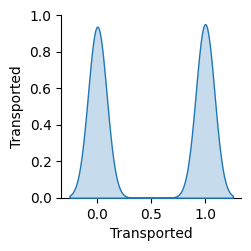

In [107]:
sb.pairplot(train_SpaceTitanic[['Transported']], diag_kind='kde')

From the previous plot,we can see that the data is almost perfectly balanced.

### **3.2 Visualization (Seaborn)**

In [108]:
train_SpaceTitanic.tail(2)

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
8691,9280,0,1,3,4,0,1,1,1,1,4,0,0,1,0
8692,9280,0,1,1,5,0,1,4,1,1,1,1,0,1,0


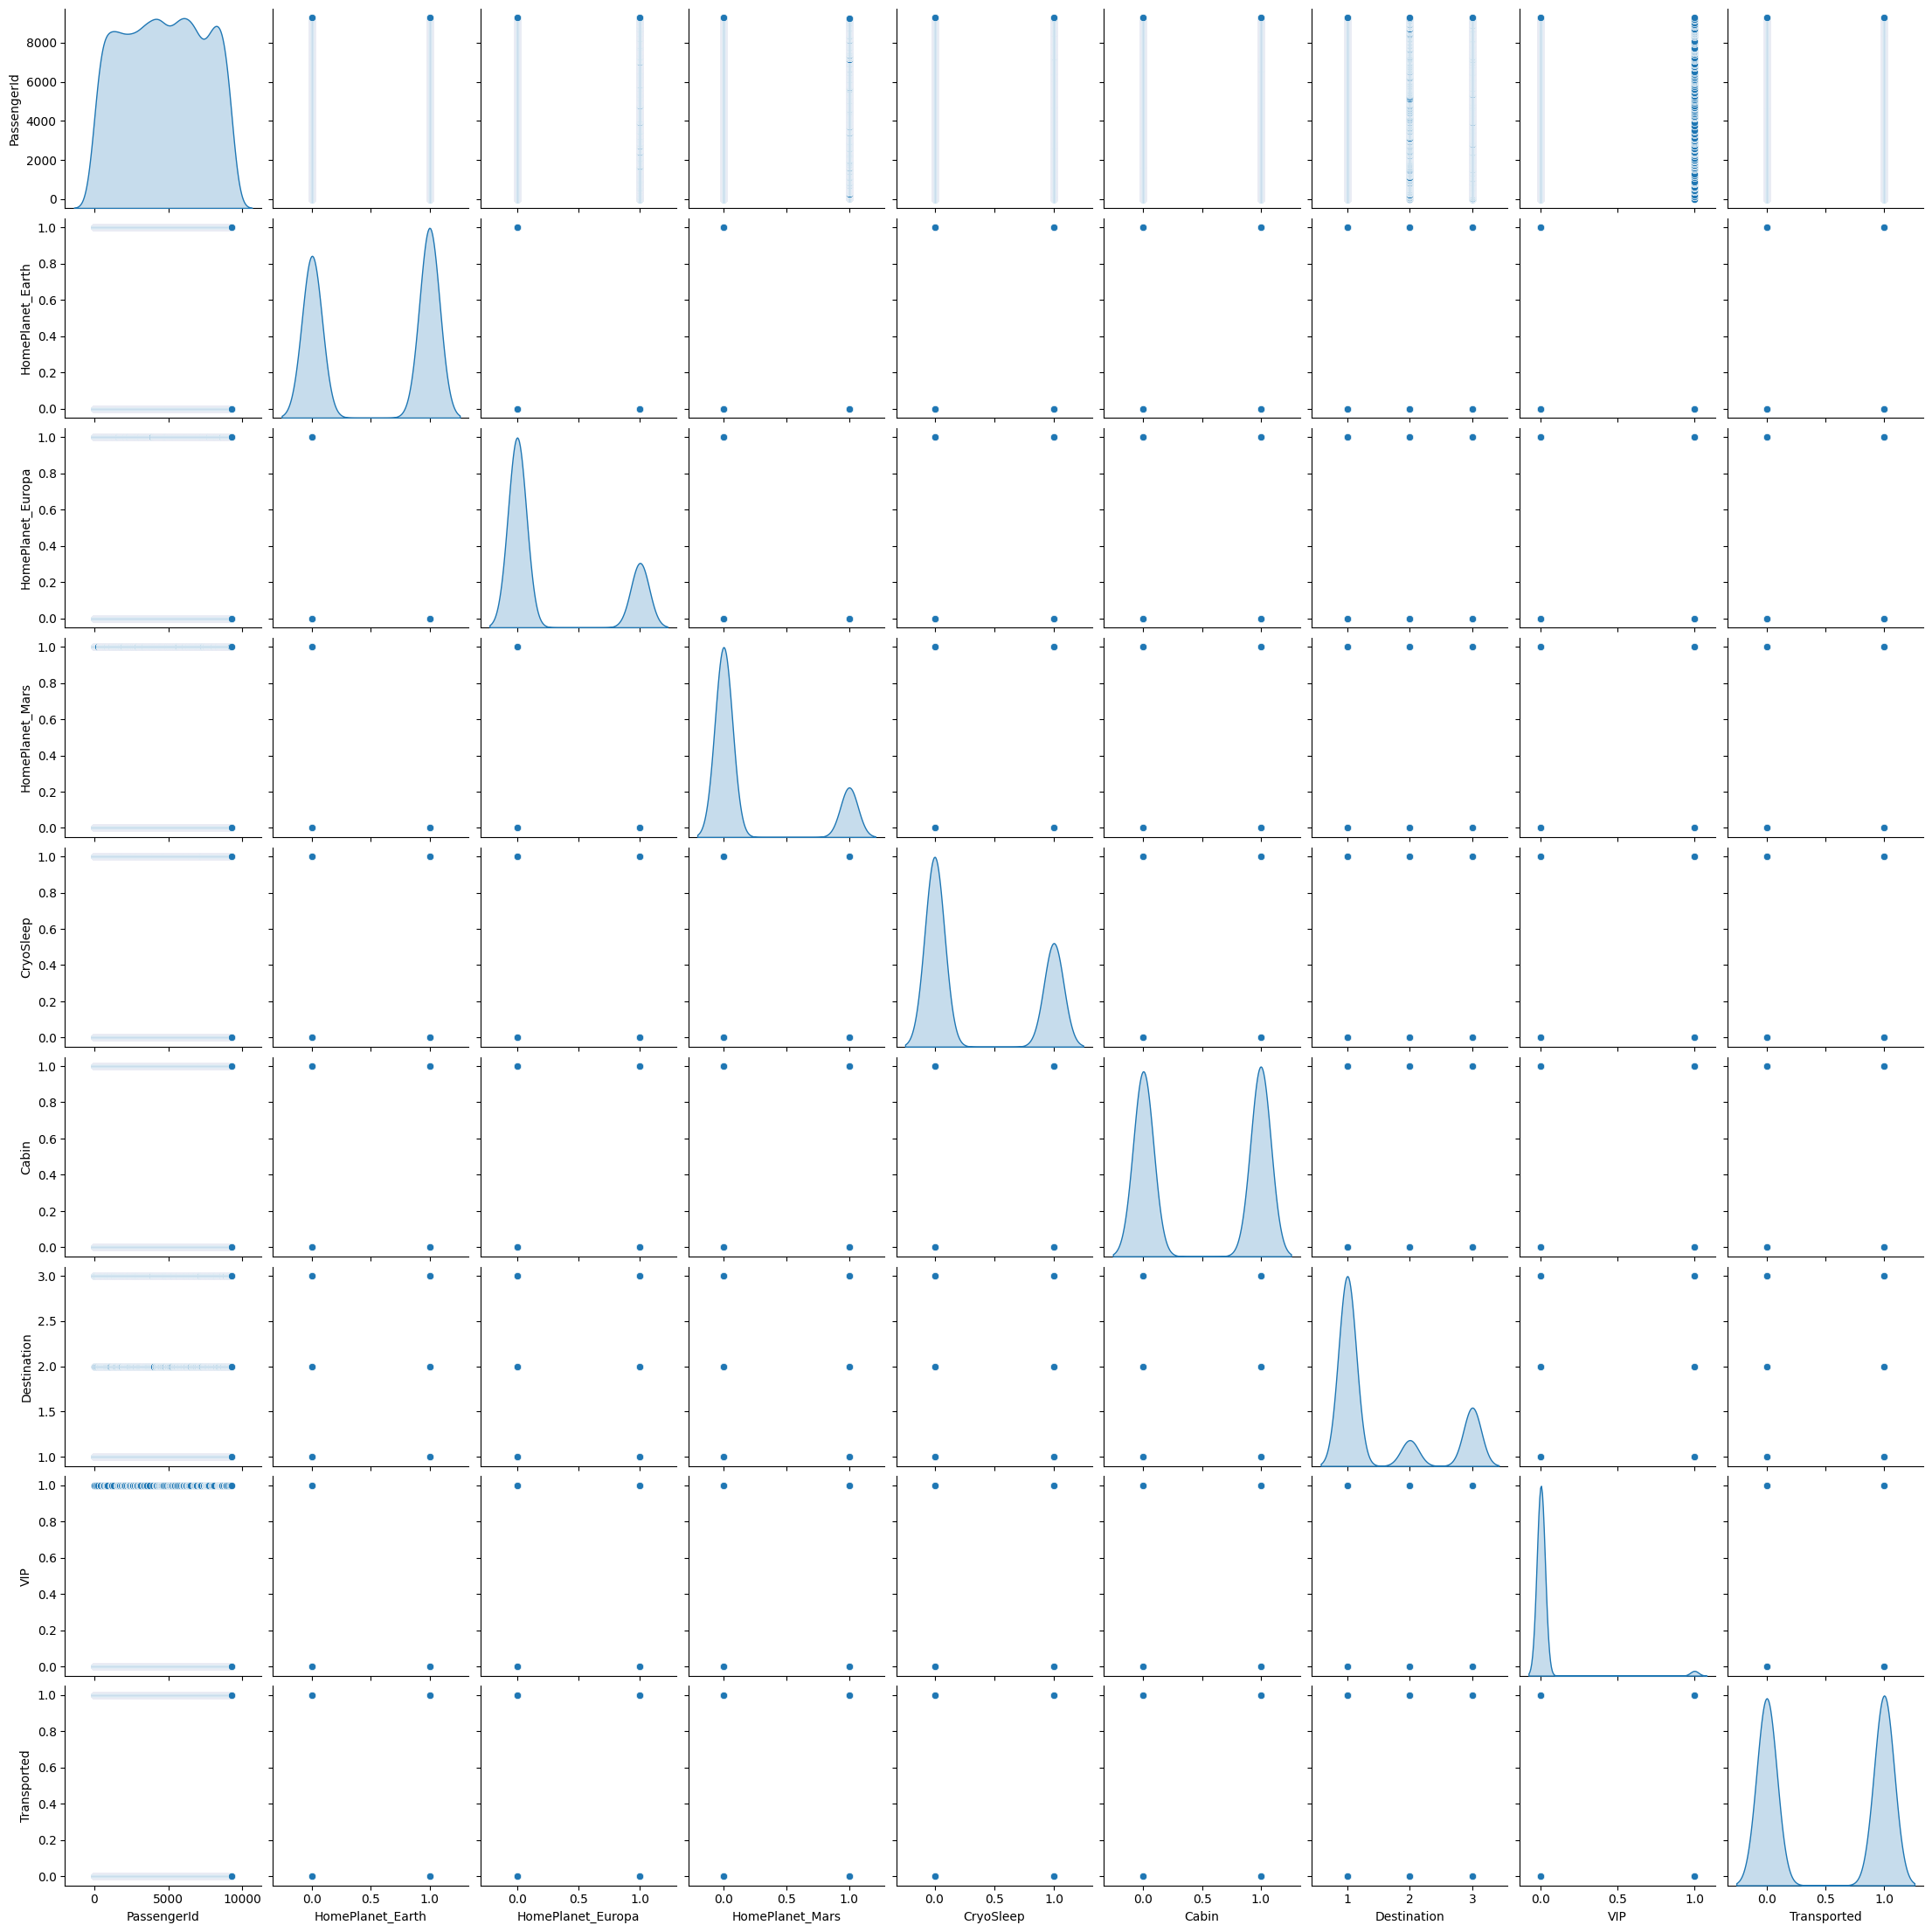

In [109]:
sb.pairplot(train_SpaceTitanic[['PassengerId','HomePlanet_Earth','HomePlanet_Europa','HomePlanet_Mars','CryoSleep','Cabin','Destination','VIP','Transported' ]], diag_kind='kde')

From the previous plot we can see that there is no any relation between the variables and "transportation" (target). Let´s see using the target variable **"Transported"** in the previous plot.

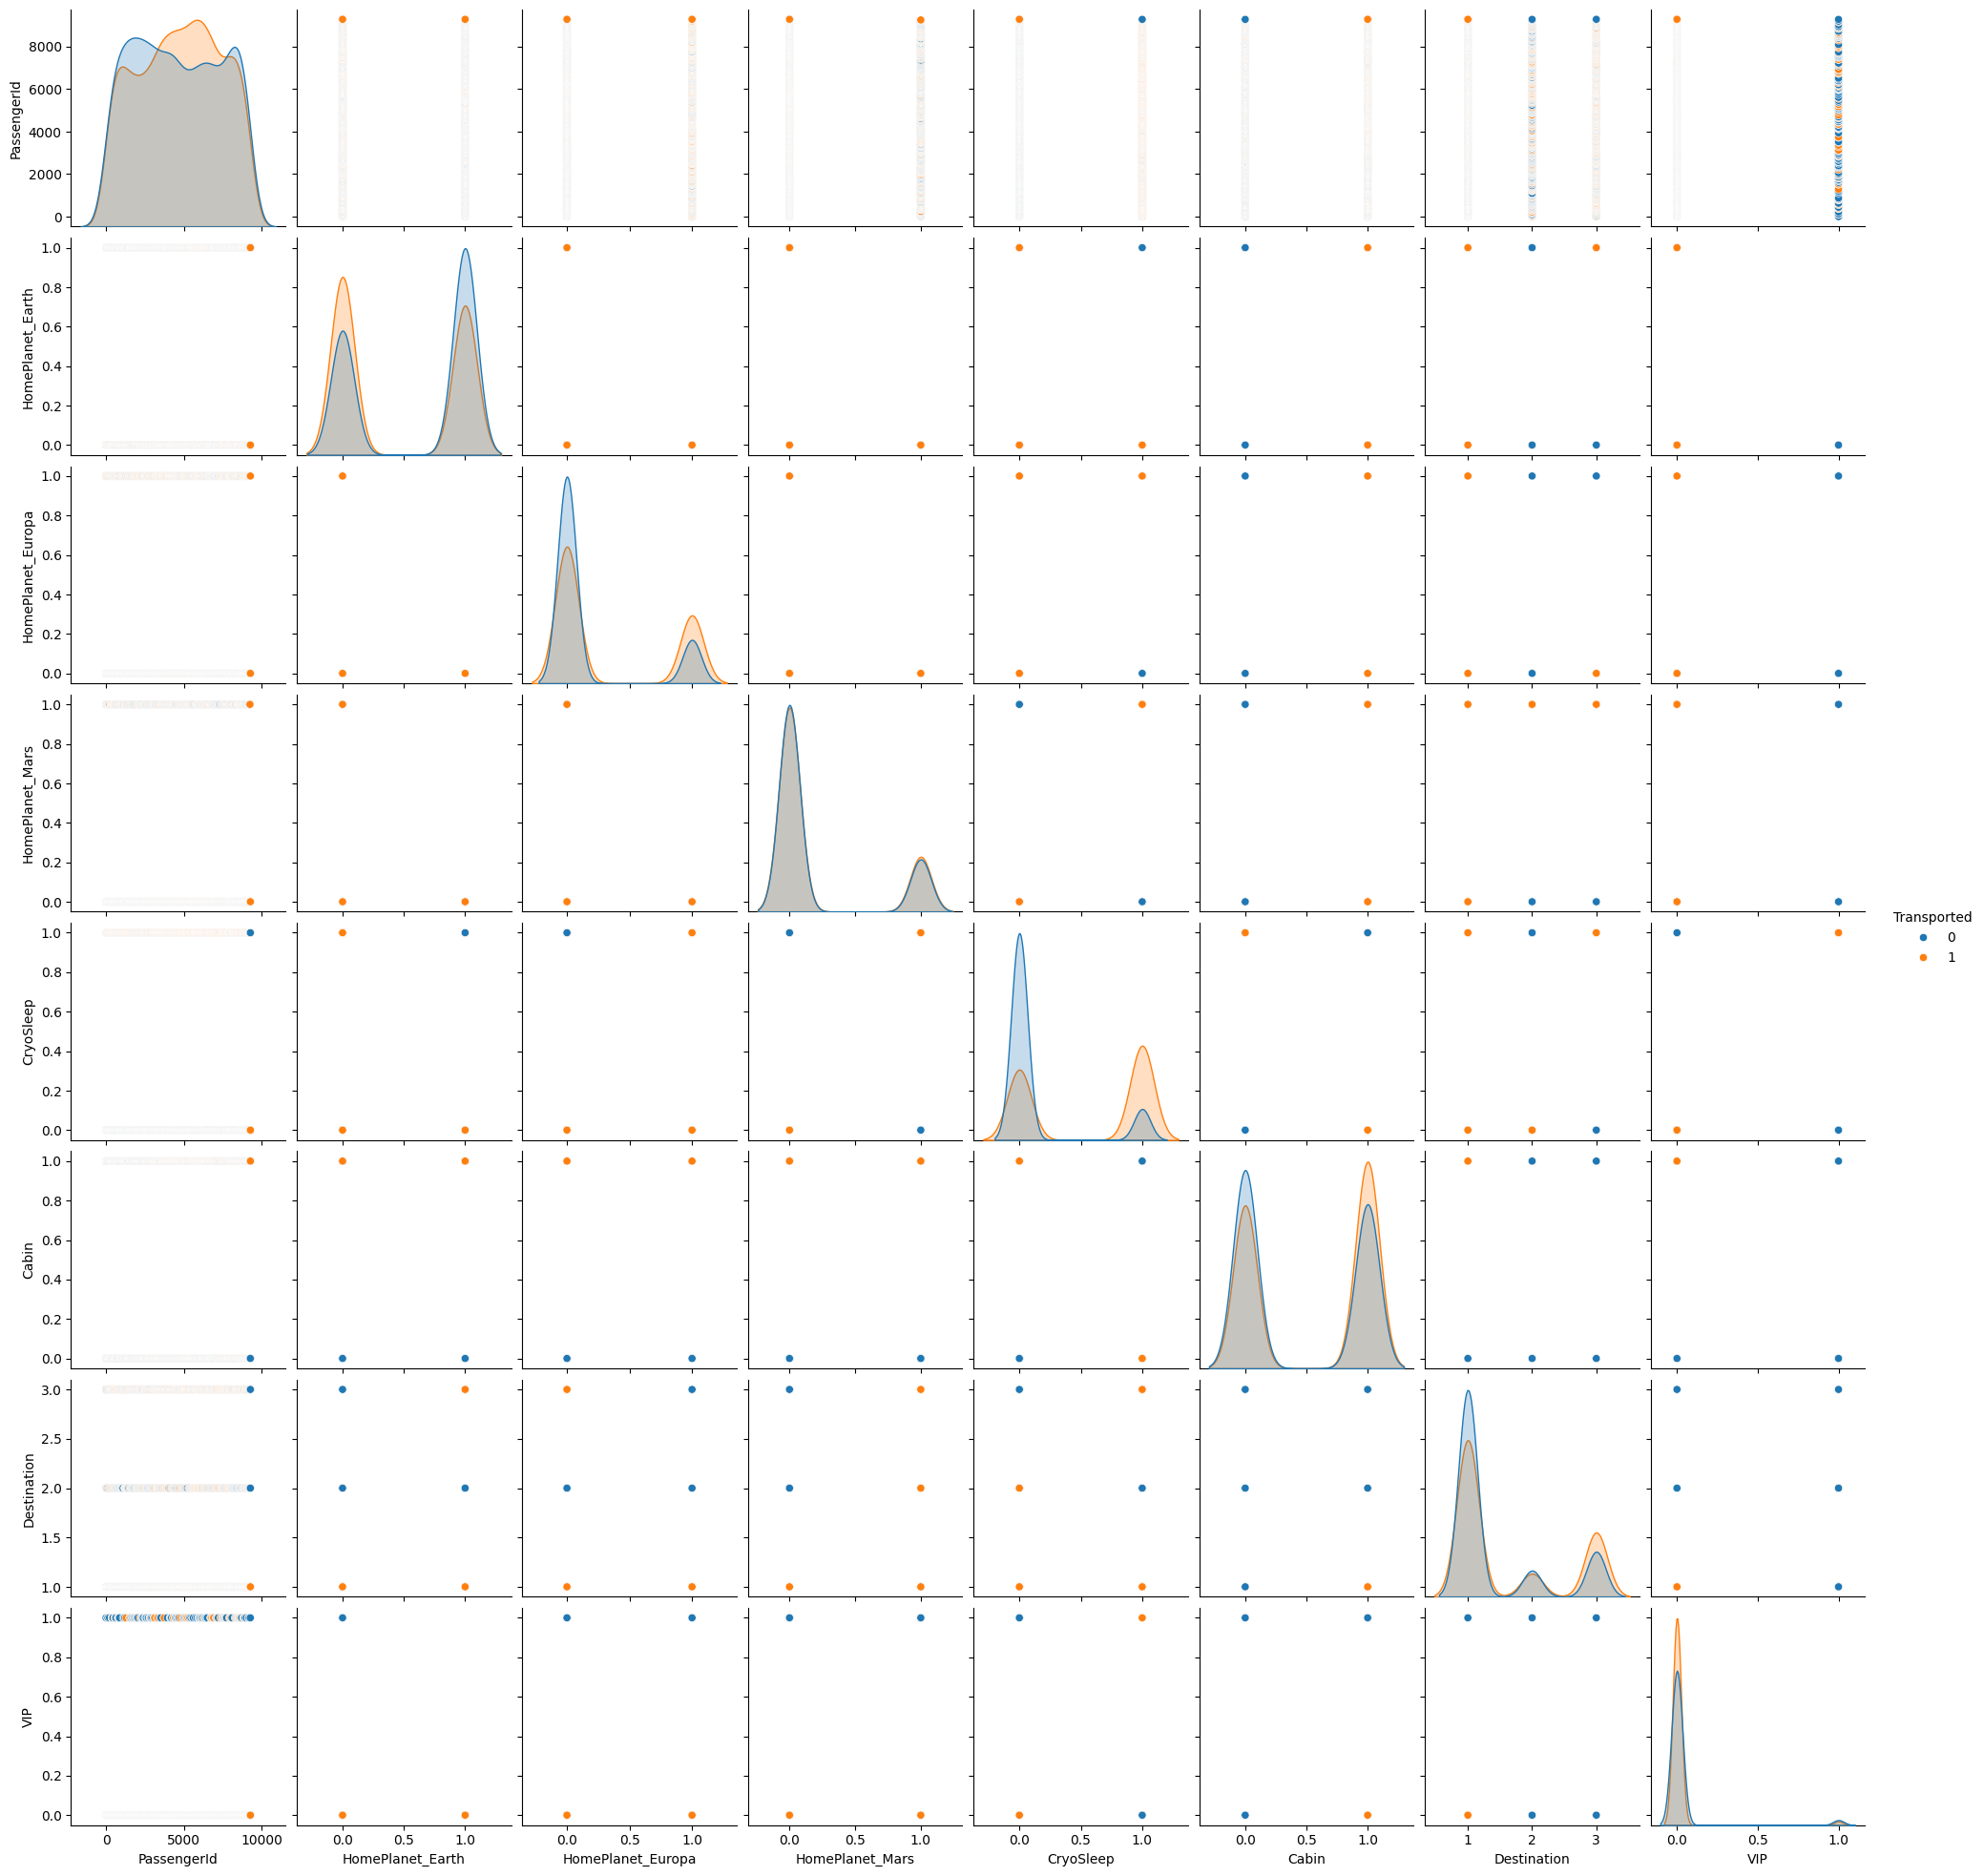

In [110]:
sb.pairplot(train_SpaceTitanic[['PassengerId','HomePlanet_Earth','HomePlanet_Europa','HomePlanet_Mars','CryoSleep','Cabin','Destination','VIP','Transported']], hue = 'Transported')

##### There are some insights that can be said about the previous plot:

1. The most of people that were not in CryoSleep was not transported. On the other hand, between them, the majority of people that were transported were actually in CryoSleep.
2. The majority of the people did not take the VIP class and the most of them were transported.  

Let´s do a similar analysis but with the variables: 'FoodCourt','RoomService','VIP','Destination','Age','VRDeck'.

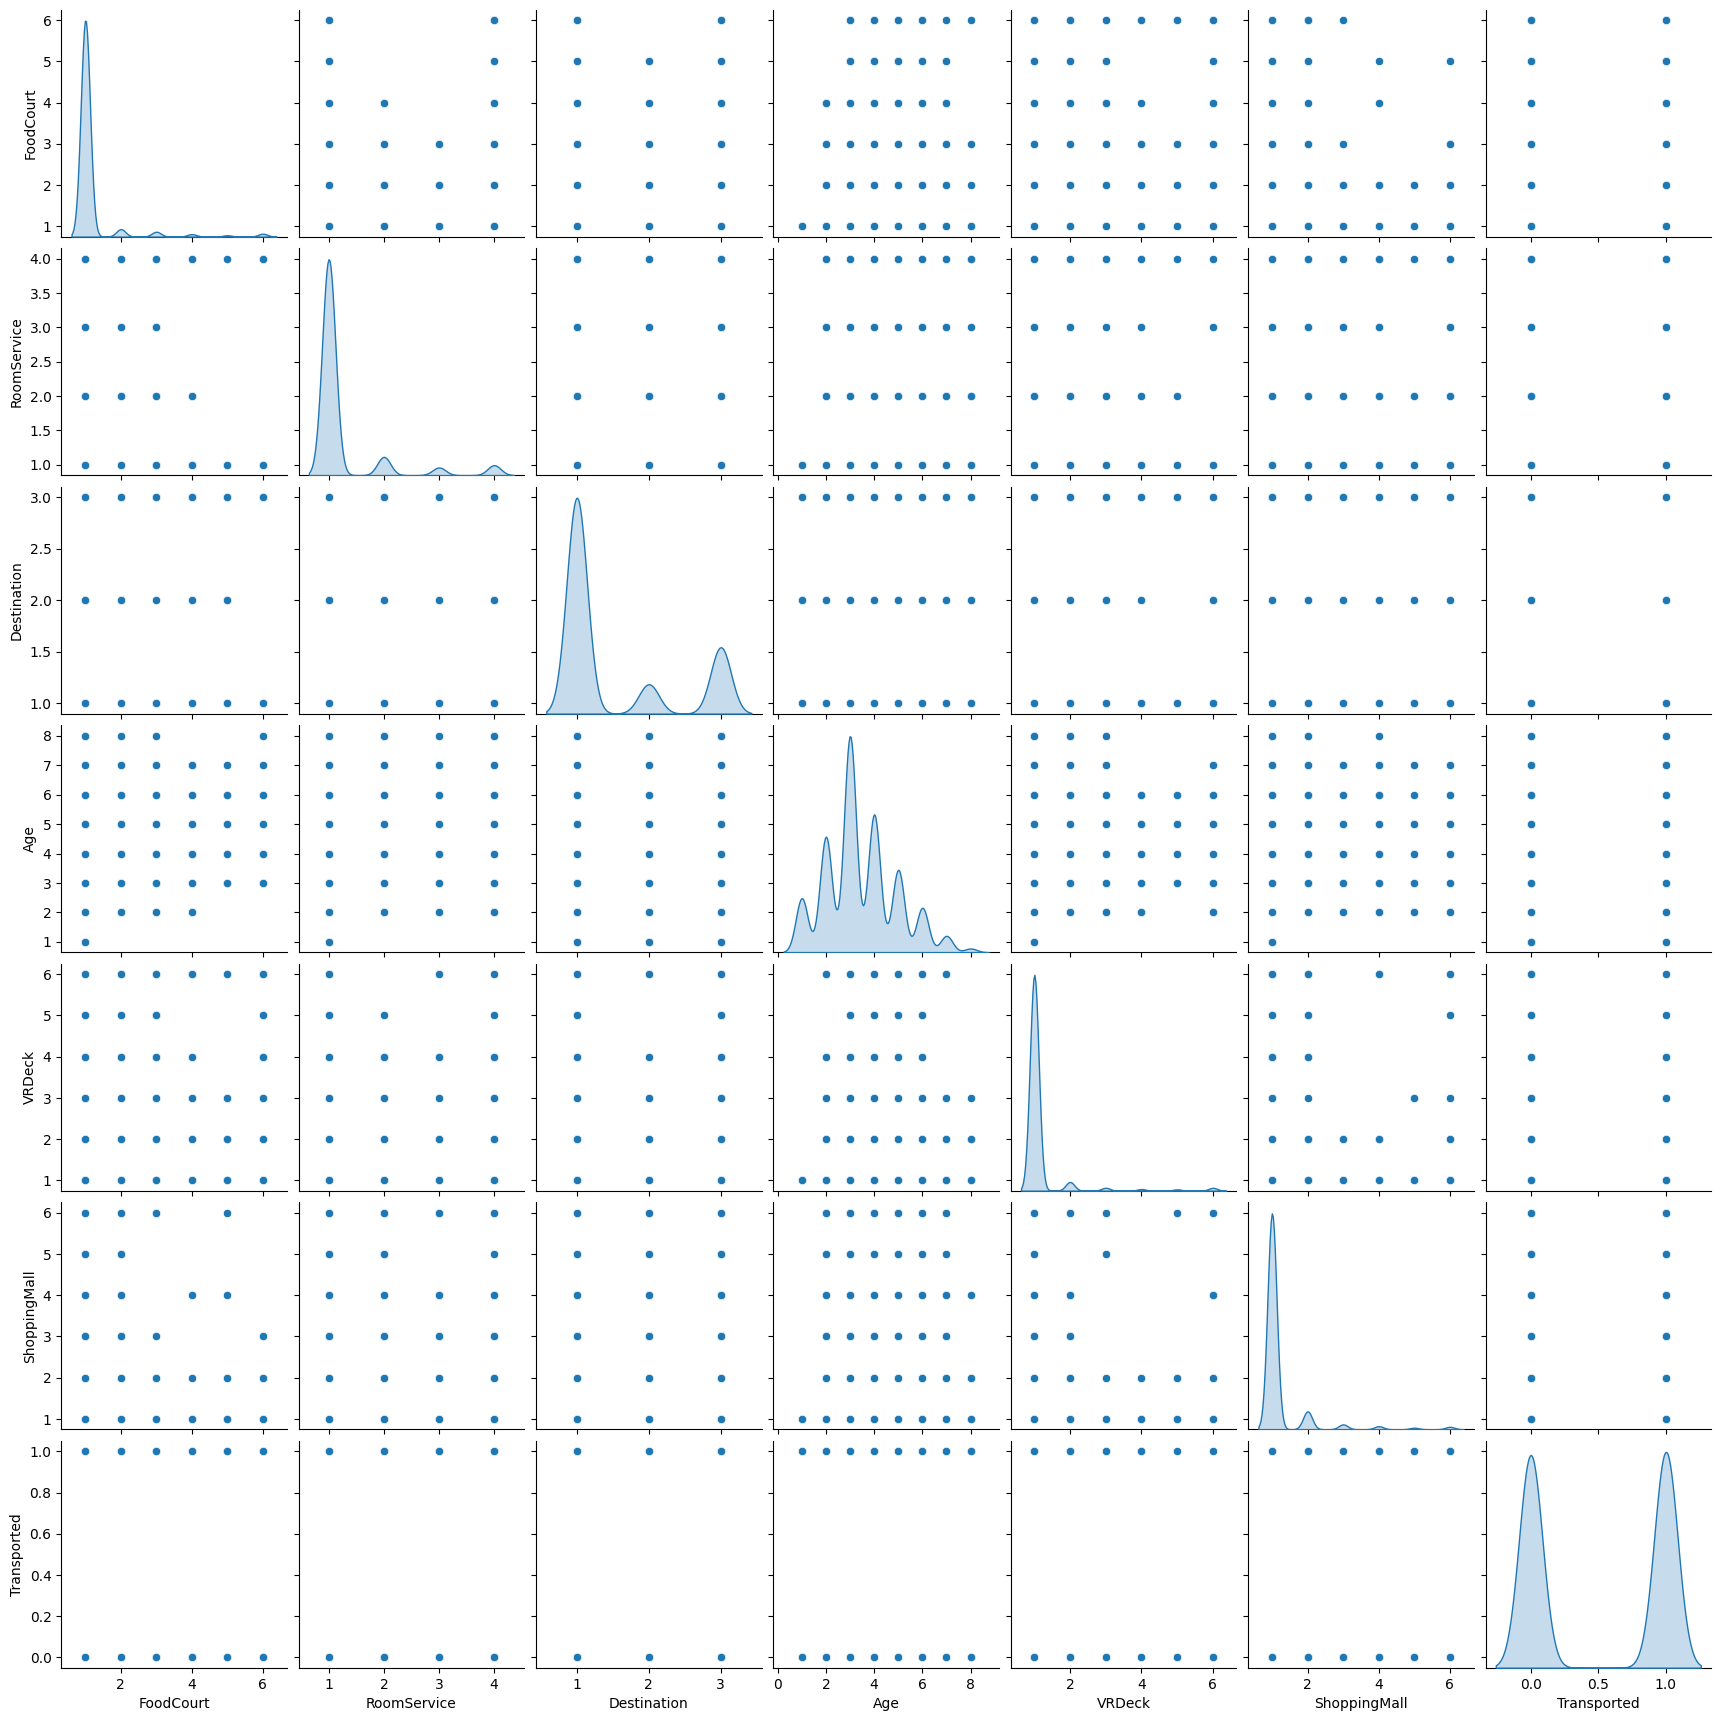

In [111]:
sb.pairplot(train_SpaceTitanic[['FoodCourt','RoomService','Destination','Age','VRDeck','ShoppingMall','Transported']], diag_kind='kde')

At first sight, we can see that there is no any relation between them.

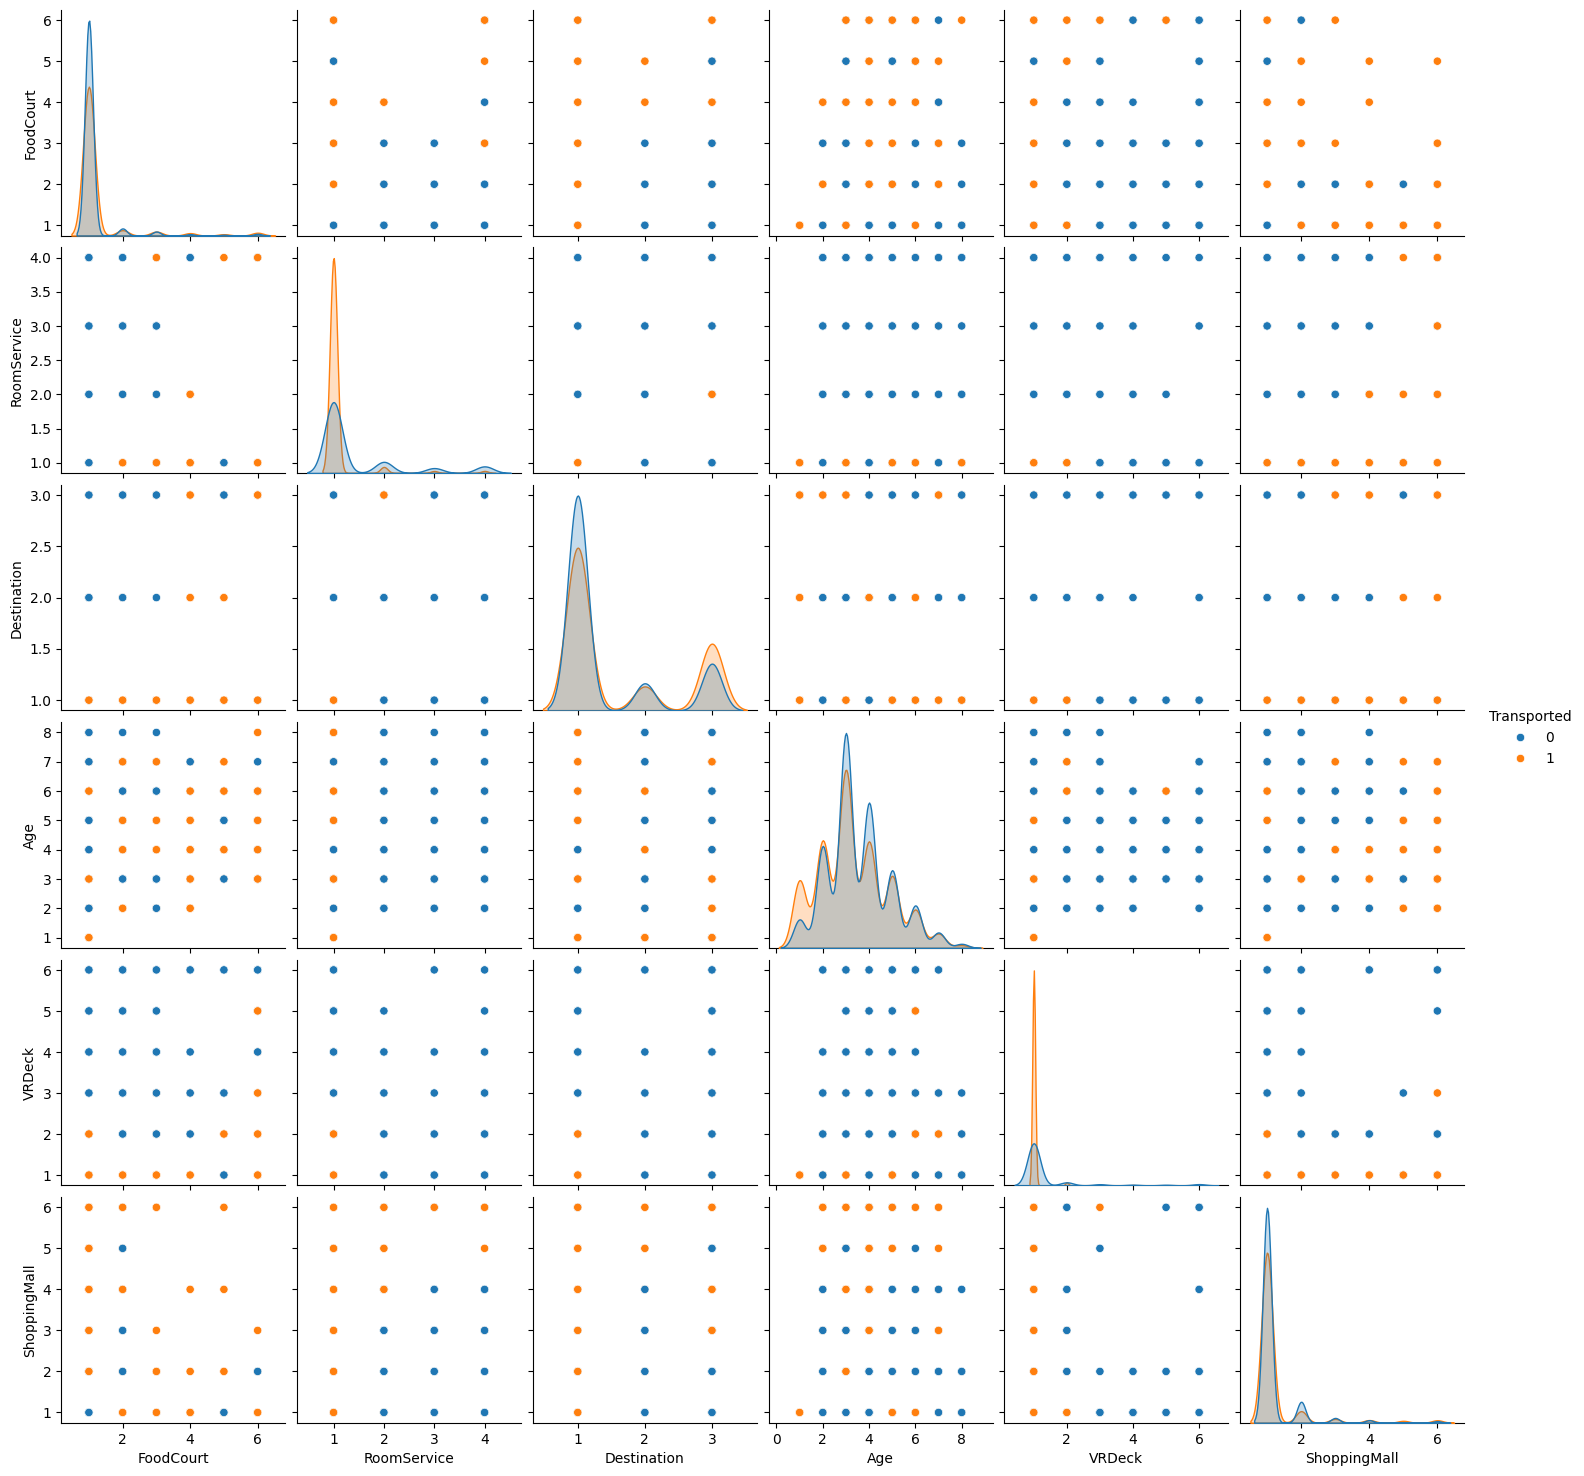

In [112]:
sb.pairplot(train_SpaceTitanic[['FoodCourt','RoomService','Destination','Age','VRDeck','ShoppingMall','Transported']], hue ='Transported', diag_kind='kde')

There are some insights in this case:
1. The people who less spent in **"RoomService"** and **"VRDeck"** were who actually were transported to another dimension.

On the other hand, there is no direct relation between the variables, at least in a first sight. We need to do further analysis with the Pearson´s correlation and the heat map with all the variables.

<Axes: >

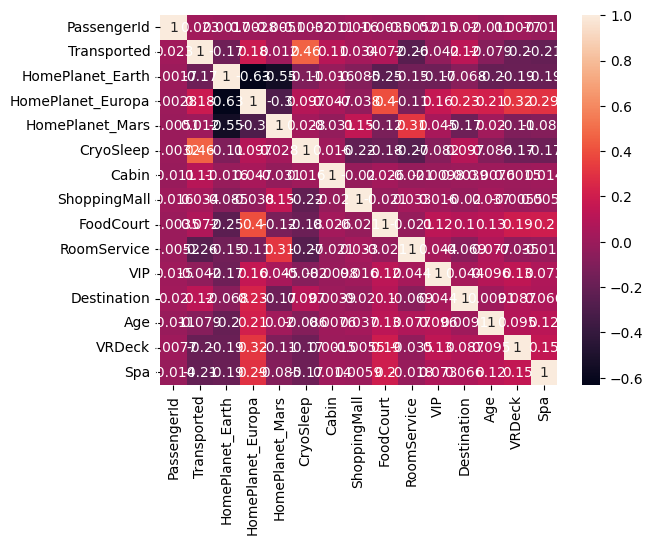

In [113]:
sb.heatmap(train_SpaceTitanic[['PassengerId','Transported','HomePlanet_Earth','HomePlanet_Europa','HomePlanet_Mars','CryoSleep','Cabin','ShoppingMall','FoodCourt','RoomService','VIP','Destination','Age','VRDeck','Spa']].corr(),annot = True)

From the Perason´s correlation we can see that the variables that are more related are "CryoSleep" and "Transportation" (target). Secondly,   Moreover, we can see the correlation of all the variables with the target ('Transported').

In [114]:
corr_matrix = train_SpaceTitanic.corr()

In [115]:
corr_matrix['Transported'].sort_values(ascending=False)

Transported          1.000000
CryoSleep            0.462803
HomePlanet_Europa    0.182004
Destination          0.123773
Cabin                0.106186
FoodCourt            0.071707
ShoppingMall         0.033623
PassengerId          0.023216
HomePlanet_Mars      0.012357
VIP                 -0.042260
Age                 -0.078528
HomePlanet_Earth    -0.168845
VRDeck              -0.196994
Spa                 -0.205392
RoomService         -0.260620
Name: Transported, dtype: float64

One more time, the closest relation is between 'Transported' and 'CryoSleep'.In second term, the "closest" relation negatively is between 'Transported' and 'RoomService', however, in a fewer magnitude. We´ll aim to the former option.

### **3.3 Selection of the attributes**

In [116]:
X = train_SpaceTitanic['CryoSleep']   ## X

In [117]:
Y = train_SpaceTitanic['Transported']   ## Y

In [118]:
X.shape

(6606,)

In [119]:
Y.shape

(6606,)

In [120]:
X_cryoSleep = np.array(X).reshape(-1,1)
Y_transported = np.array(Y).reshape(-1,1)

print(X_cryoSleep.shape)
print(Y_transported.shape)

(6606, 1)
(6606, 1)


### **3.4 Train/Test/Val split**

In [121]:
X_train,X_val, Y_train, Y_val = train_test_split(X_cryoSleep,Y_transported, test_size=0.2)

In [122]:
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(5284, 1)
(1322, 1)
(5284, 1)
(1322, 1)


We´ve set the cross validation and train dataset for training.

### **3.5 Scaler**

In [123]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


In [124]:
X_val = scaler.transform(X_val)

In [125]:
print(X_train)

[[ 1.35117299]
 [ 1.35117299]
 [-0.74009768]
 ...
 [-0.74009768]
 [-0.74009768]
 [-0.74009768]]


In [126]:
print(Y_train)

[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]


In [127]:
Y_train = np.reshape(Y_train,(5284,))

In [128]:
Y_train.ndim

1

## **4. Training of the model (Classification)**

### **4.1 Hyperparameters**

In the case of **Logistic Regression**, in principle, there are no critical hyperparameters to tune. However, there are some to comment, such as ***solver***, ***penalty*** and ***regularization strength***. Indeed, the tunning of these hyperparameters usually requires great amount of processing.

### **4.2 Predictions on the validation dataset (no test dataset 'final')**

In [129]:
# here, we fix the model as Logistic Regression

model = LogisticRegression()

model.fit(X_train,Y_train)


LogisticRegression()

In [130]:
print(X_val.shape)
y_pred = model.predict(X_val)
print(y_pred.shape)
print(y_pred)

(1322, 1)
(1322,)
[0 0 0 ... 0 0 1]


As we have balanced data, we might use **accuracy** metric to evaluate the model.

In [131]:
# acc = accuracy

acc = accuracy_score(Y_val, y_pred)
print('accuracy of the model:')
print(acc)

accuracy of the model:
0.7239031770045385


However, we could compute other metrics, such as follows.

In [132]:
# Verify the Confusion Matrix
print(Y_val.shape)
print(y_pred.shape)

matrix = confusion_matrix(Y_val, y_pred)
print('Matriz de Confusión:')
print(matrix)

(1322, 1)
(1322,)
Matriz de Confusión:
[[564  69]
 [296 393]]


In [133]:
# prec = precision

prec = precision_score(Y_val, y_pred)
print('Precision del modelo:')
print(prec)

Precision del modelo:
0.8506493506493507


### **4.3 Predictions on the test dataset ('final'...)**

## **5. Storage**

### **5.1 Model**

In [134]:
def saveModel(name_model):
  #name = name_model
  model_file = f"{name_model}" + ".pkl"

  with open(model_file,'wb') as f:
      pickle.dump(name_model,f)

In [135]:
saveModel(model)

### **5.2 Scaler**

In [136]:
def saveScaler(name_scaler):

  scaler_file = f'{name_scaler}'+'.pkl'

  with open(scaler_file,'wb') as f:
      pickle.dump(scaler,f)


In [137]:
saveScaler(scaler)